In [1]:
import torch
import torch.nn as nn

In [2]:
GPT_CONFIG_124M = {
    "vocab_size":50257,
    "context_length":1024,
    "embedding_dim":768,
    "num_of_heads":12,
    "num_of_layers":12,
    "drop_rate":0.1,
    "qkv_bias":False
}

In [3]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self,x):
        return 0.5 * x * (
            1 + torch.tanh(torch.sqrt(torch.tensor(2.0/torch.pi)) * (x + 0.44715 * torch.pow(x,3)))
        )

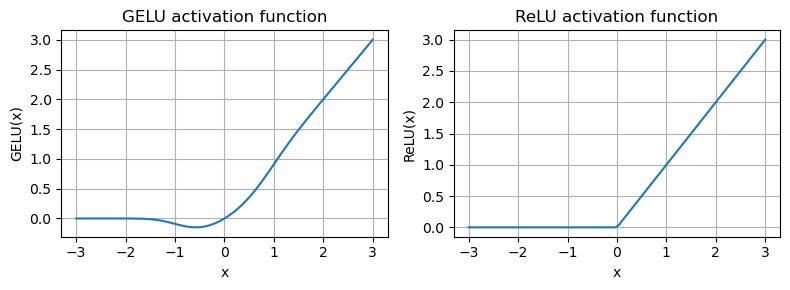

In [4]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
class FeedForward(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(config['embedding_dim'], 4* config['embedding_dim']),
            GELU(),
            nn.Linear(4*config['embedding_dim'],config['embedding_dim'])
        )
        
    def forward(self, x):
        return self.layers(x)

In [6]:
x = torch.rand(2,3,768)
x

tensor([[[5.8958e-01, 9.9082e-01, 6.7052e-01,  ..., 8.4539e-01,
          1.7513e-01, 7.2719e-01],
         [6.4608e-01, 4.0362e-02, 5.6256e-01,  ..., 6.0500e-01,
          6.8375e-01, 4.6232e-01],
         [8.5053e-01, 9.6228e-01, 8.1601e-01,  ..., 2.3778e-01,
          7.7252e-01, 1.4567e-01]],

        [[6.7645e-04, 6.0120e-01, 1.5403e-01,  ..., 2.0128e-02,
          7.3268e-02, 1.9993e-01],
         [2.7269e-01, 7.1523e-01, 5.4719e-01,  ..., 3.7799e-01,
          8.5906e-01, 6.6749e-01],
         [8.9111e-02, 9.6577e-01, 5.6275e-01,  ..., 4.9329e-01,
          6.0086e-01, 3.1524e-01]]])

In [7]:
ff = FeedForward(GPT_CONFIG_124M)

In [8]:
output = ff(x)
output

tensor([[[ 0.0218,  0.0429, -0.1745,  ...,  0.1844,  0.0054, -0.0750],
         [ 0.0353,  0.0222, -0.1729,  ...,  0.1521, -0.0357, -0.0257],
         [ 0.0239, -0.0124, -0.1355,  ...,  0.2352, -0.0041, -0.0583]],

        [[ 0.0889, -0.0836, -0.1874,  ...,  0.0945, -0.1576, -0.1154],
         [-0.1316,  0.0232, -0.1886,  ...,  0.1431, -0.0581, -0.0813],
         [ 0.0315,  0.0348, -0.1153,  ...,  0.1312,  0.0218, -0.0679]]],
       grad_fn=<ViewBackward0>)

In [9]:
output.shape

torch.Size([2, 3, 768])